Saving novatech_app_usage.csv to novatech_app_usage (1).csv
Data Sample:
   user_id        login_time  session_duration feature_used  user_feedback
0        1  10/02/2025 08.15                20       search              4
1        2  10/02/2025 12.30                15       upload              5
2        3  10/02/2025 20.45                25     download              3
3        4  11/02/2025 19.00                30       search              4
4        5  11/02/2025 14.20                10       upload              2

Cek Missing Values:
user_id             0
login_time          0
session_duration    0
feature_used        0
user_feedback       0
dtype: int64

Fitur Paling Populer:
feature_used
search      4
upload      3
download    3
Name: count, dtype: int64


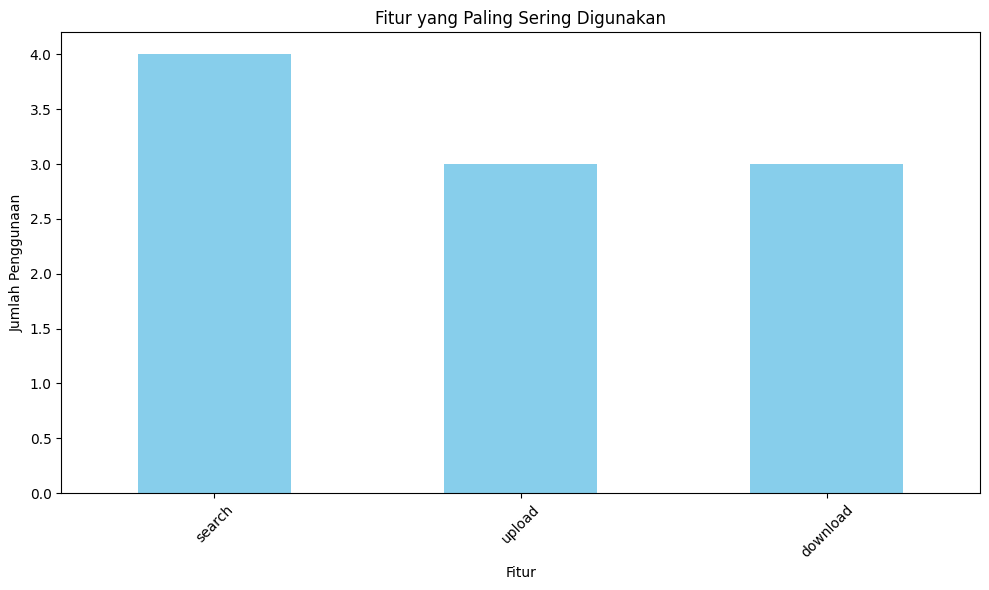


Daftar Kolom yang Tersedia:
Index(['user_id', 'login_time', 'session_duration', 'feature_used',
       'user_feedback'],
      dtype='object')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload file CSV
uploaded = files.upload()


# 1. Membaca data dari file CSV dengan delimiter titik koma (;)
data = pd.read_csv('novatech_app_usage.csv', delimiter=';')

# 2. Melihat sekilas data
print("Data Sample:")
print(data.head())

# 3. Mengecek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())

# 4. Analisis Fitur yang Paling Sering Digunakan
print("\nFitur Paling Populer:")
if 'feature_used' in data.columns:
    feature_trend = data['feature_used'].value_counts()  # Menghitung berapa kali tiap fitur digunakan
    print(feature_trend)

    # 5. Visualisasi Fitur Populer
    plt.figure(figsize=(10, 6))
    feature_trend.plot(kind='bar', color='skyblue')
    plt.title('Fitur yang Paling Sering Digunakan')
    plt.xlabel('Fitur')
    plt.ylabel('Jumlah Penggunaan')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'feature_used' tidak ditemukan. Cek nama kolom di CSV.")

# 6. Menampilkan nama kolom untuk verifikasi
print("\nDaftar Kolom yang Tersedia:")
print(data.columns)


## **MEAN DURASI SESI UNTUK SETIAP FITUR**


In [10]:
avg_session = data.groupby('feature_used')['session_duration'].mean()
print("Rata-rata Durasi Sesi per Fitur:\n", avg_session)

Rata-rata Durasi Sesi per Fitur:
 feature_used
download    19.666667
search      31.250000
upload      14.333333
Name: session_duration, dtype: float64


## **MEAN FEEDBACK PENGGUNA UNTUK SETIAP FITUR**

In [5]:
# Rata-rata feedback pengguna untuk setiap fitur
avg_feedback = data.groupby('feature_used')['user_feedback'].mean()
print("Rata-rata Feedback per Fitur:\n", avg_feedback)


Rata-rata Feedback per Fitur:
 feature_used
download    3.666667
search      4.500000
upload      3.333333
Name: user_feedback, dtype: float64


## **GRAFIK DISTRIBUSI LOGIN PENGGUNA**

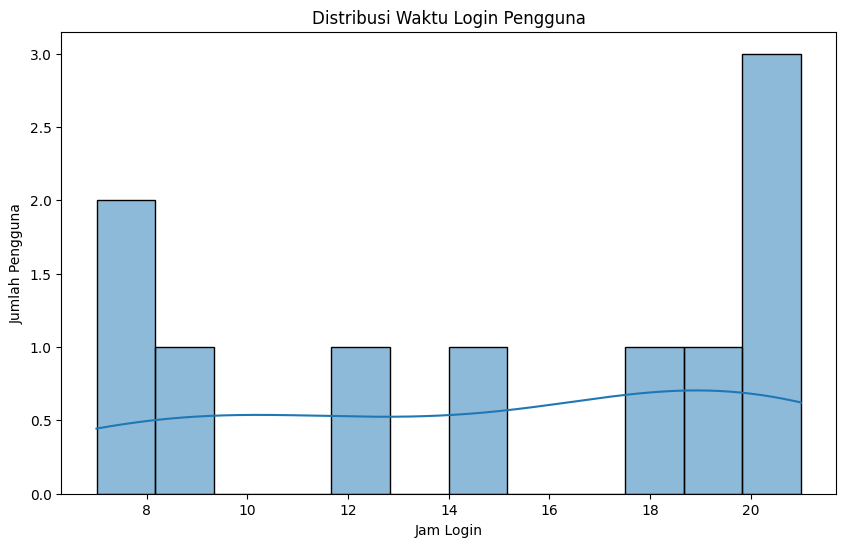

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ganti titik (.) dengan titik dua (:) di kolom login_time
data['login_time'] = data['login_time'].str.replace('.', ':', regex=False)

# Konversi login_time jadi format datetime lalu ambil jamnya
data['login_hour'] = pd.to_datetime(data['login_time'], dayfirst=True).dt.hour

# Plot distribusi login
plt.figure(figsize=(10, 6))
sns.histplot(data['login_hour'], bins=12, kde=True)
plt.title('Distribusi Waktu Login Pengguna')
plt.xlabel('Jam Login')
plt.ylabel('Jumlah Pengguna')
plt.show()


## **KORELASI ANTARA DURASI SESI DAN FEEDBACK PENGGUNA**

In [8]:
# Korelasi antara durasi sesi dan feedback pengguna
correlation = data['session_duration'].corr(data['user_feedback'])
print("Korelasi Durasi Sesi dan Feedback:", correlation)


Korelasi Durasi Sesi dan Feedback: 0.5634830092900749


## **TAMBAHAN INSIGHT**

In [15]:
import seaborn as sns

# 1. Mengubah kolom login_time menjadi format datetime
if 'login_time' in data.columns:
    data['login_time'] = pd.to_datetime(data['login_time'], errors='coerce')

    # 2. Ekstrak jam dari login_time untuk analisis jam aktif pengguna
    data['login_hour'] = data['login_time'].dt.hour

    # 3. Hitung frekuensi login per jam
    login_distribution = data['login_hour'].value_counts().sort_index()

    # 4. Visualisasi Jam Login Pengguna
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=login_distribution.index, y=login_distribution.values, marker='o', color='green')
    plt.title('Distribusi Login Pengguna per Jam')
    plt.xlabel('Jam (0-23)')
    plt.ylabel('Jumlah Login')
    plt.xticks(range(0, 24))
    plt.grid()
    plt.show()

    print("\nJam Paling Aktif Pengguna:")
    print(login_distribution)
else:
    print("Kolom 'login_time' tidak ditemukan.")

# 5. Analisis Rata-rata Durasi Sesi per Fitur
if 'session_duration' in data.columns and 'feature_used' in data.columns:
    feature_duration = data.groupby('feature_used')['session_duration'].mean().sort_values()

    # 6. Visualisasi Rata-rata Durasi Sesi per Fitur
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_duration.index, y=feature_duration.values, palette="Blues")
    plt.title('Durasi Rata-rata Penggunaan per Fitur')
    plt.xlabel('Fitur')
    plt.ylabel('Durasi Rata-rata (menit)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nDurasi Rata-rata Penggunaan per Fitur:")
    print(feature_duration)
else:
    print("Kolom 'session_duration' atau 'feature_used' tidak ditemukan.")

# 7. Analisis Rata-rata Feedback per Fitur
if 'user_feedback' in data.columns and 'feature_used' in data.columns:
    feedback_avg = data.groupby('feature_used')['user_feedback'].mean().sort_values(ascending=False)

    # 8. Visualisasi Rata-rata Feedback per Fitur
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feedback_avg.index, y=feedback_avg.values, palette="coolwarm")
    plt.title('Rata-rata Feedback per Fitur')
    plt.xlabel('Fitur')
    plt.ylabel('Rata-rata Feedback (1-5)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nRata-rata Feedback per Fitur:")
    print(feedback_avg)
else:
    print("Kolom 'user_feedback' atau 'feature_used' tidak ditemukan.")

# 9. Rekomendasi berdasarkan hasil analisis
print("\n📊 Rekomendasi untuk NovaTech:")
print("- **Fokus pada fitur dengan rating tinggi & durasi lama** → Jika fitur memiliki rating tinggi tapi jarang digunakan, bisa dipromosikan.")
print("- **Optimalisasi jam sibuk** → Kirim notifikasi saat pengguna paling aktif.")
print("- **Perbaiki fitur dengan rating rendah** → Analisis lebih lanjut kenapa fitur tersebut kurang disukai.")


Kolom 'login_time' tidak ditemukan.
Kolom 'session_duration' atau 'feature_used' tidak ditemukan.
Kolom 'user_feedback' atau 'feature_used' tidak ditemukan.

📊 Rekomendasi untuk NovaTech:
- **Fokus pada fitur dengan rating tinggi & durasi lama** → Jika fitur memiliki rating tinggi tapi jarang digunakan, bisa dipromosikan.
- **Optimalisasi jam sibuk** → Kirim notifikasi saat pengguna paling aktif.
- **Perbaiki fitur dengan rating rendah** → Analisis lebih lanjut kenapa fitur tersebut kurang disukai.


## **matching antara kode awal dan insight**

Saving novatech_app_usage.csv to novatech_app_usage (2).csv
Data Sample:
   user_id        login_time  session_duration feature_used  user_feedback
0        1  10/02/2025 08.15                20       search              4
1        2  10/02/2025 12.30                15       upload              5
2        3  10/02/2025 20.45                25     download              3
3        4  11/02/2025 19.00                30       search              4
4        5  11/02/2025 14.20                10       upload              2

Cek Missing Values:
user_id             0
login_time          0
session_duration    0
feature_used        0
user_feedback       0
dtype: int64

Fitur Paling Populer:
feature_used
search      4
upload      3
download    3
Name: count, dtype: int64


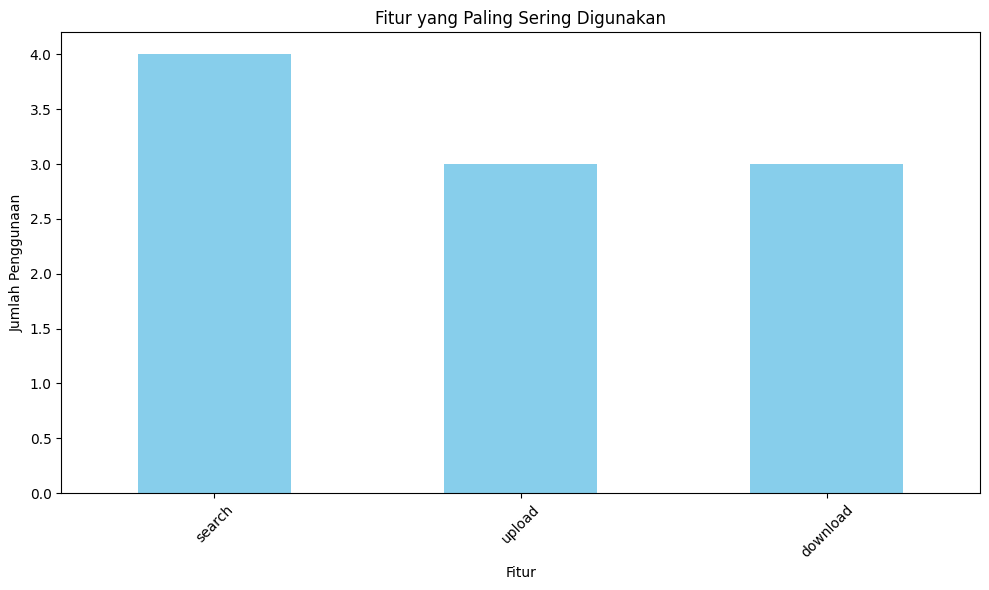


Daftar Kolom yang Tersedia:
Index(['user_id', 'login_time', 'session_duration', 'feature_used',
       'user_feedback'],
      dtype='object')
Rata-rata Durasi Sesi per Fitur:
 feature_used
download    19.666667
search      31.250000
upload      14.333333
Name: session_duration, dtype: float64


<ipython-input-16-957a0cda2a86>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_session.index, y=avg_session.values, palette="Blues")


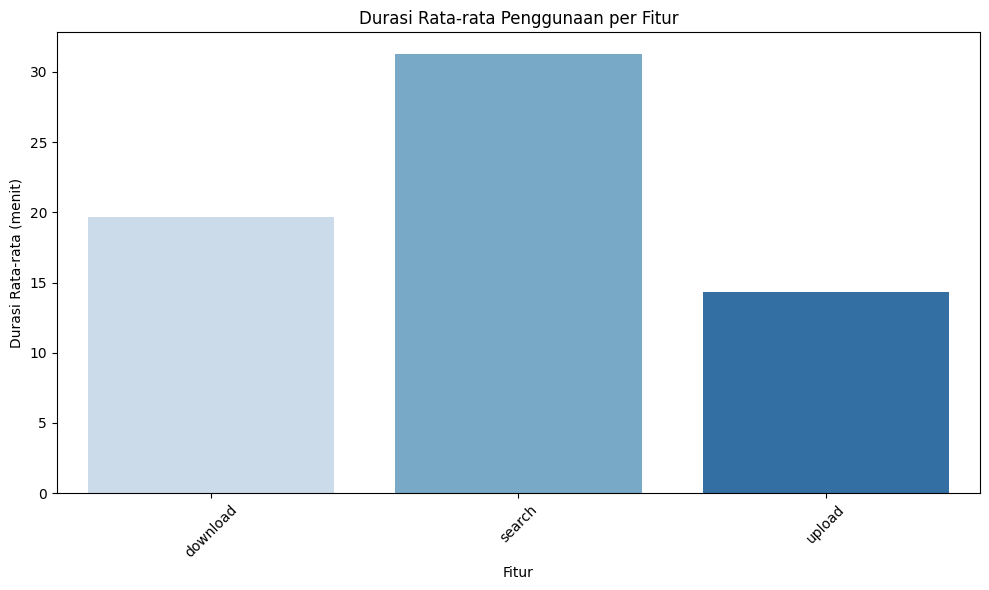

Rata-rata Feedback per Fitur:
 feature_used
search      4.500000
download    3.666667
upload      3.333333
Name: user_feedback, dtype: float64


<ipython-input-16-957a0cda2a86>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette="coolwarm")


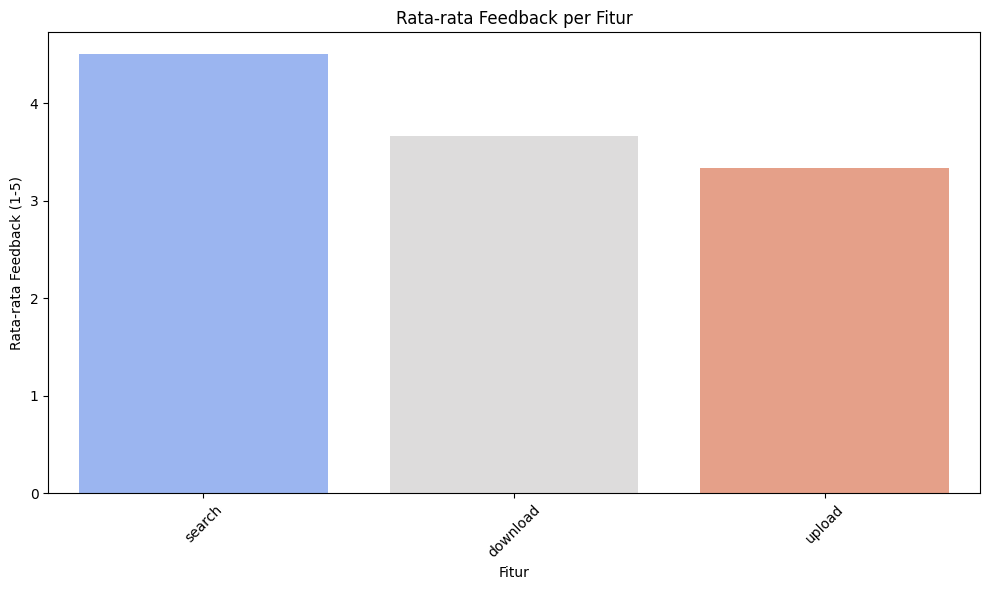


📊 Rekomendasi untuk NovaTech:
- **Fokus pada fitur dengan rating tinggi & durasi lama** → Jika fitur memiliki rating tinggi tapi jarang digunakan, bisa dipromosikan.
- **Optimalisasi jam sibuk** → Kirim notifikasi saat pengguna paling aktif.
- **Perbaiki fitur dengan rating rendah** → Analisis lebih lanjut kenapa fitur tersebut kurang disukai.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# 1. Membaca data dari file CSV dengan delimiter titik koma (;)
data = pd.read_csv('novatech_app_usage.csv', delimiter=';')

# 2. Melihat sekilas data
print("Data Sample:")
print(data.head())

# 3. Mengecek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())

# 4. Analisis Fitur yang Paling Sering Digunakan
if 'feature_used' in data.columns:
    feature_trend = data['feature_used'].value_counts()
    print("\nFitur Paling Populer:")
    print(feature_trend)

    # 5. Visualisasi Fitur Populer
    plt.figure(figsize=(10, 6))
    feature_trend.plot(kind='bar', color='skyblue')
    plt.title('Fitur yang Paling Sering Digunakan')
    plt.xlabel('Fitur')
    plt.ylabel('Jumlah Penggunaan')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'feature_used' tidak ditemukan. Cek nama kolom di CSV.")

# 6. Menampilkan nama kolom untuk verifikasi
print("\nDaftar Kolom yang Tersedia:")
print(data.columns)

# 7. Rata-rata Durasi Sesi untuk Setiap Fitur
if 'session_duration' in data.columns and 'feature_used' in data.columns:
    avg_session = data.groupby('feature_used')['session_duration'].mean()
    print("Rata-rata Durasi Sesi per Fitur:\n", avg_session)

    # Visualisasi Rata-rata Durasi Sesi per Fitur
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_session.index, y=avg_session.values, palette="Blues")
    plt.title('Durasi Rata-rata Penggunaan per Fitur')
    plt.xlabel('Fitur')
    plt.ylabel('Durasi Rata-rata (menit)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'session_duration' atau 'feature_used' tidak ditemukan.")

# 8. Rata-rata Feedback Pengguna untuk Setiap Fitur
if 'user_feedback' in data.columns and 'feature_used' in data.columns:
    avg_feedback = data.groupby('feature_used')['user_feedback'].mean().sort_values(ascending=False)
    print("Rata-rata Feedback per Fitur:\n", avg_feedback)

    # Visualisasi Rata-rata Feedback per Fitur
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette="coolwarm")
    plt.title('Rata-rata Feedback per Fitur')
    plt.xlabel('Fitur')
    plt.ylabel('Rata-rata Feedback (1-5)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'user_feedback' atau 'feature_used' tidak ditemukan.")

# 9. Rekomendasi berdasarkan hasil analisis
print("\n📊 Rekomendasi untuk NovaTech:")
print("- **Fokus pada fitur dengan rating tinggi & durasi lama** → Jika fitur memiliki rating tinggi tapi jarang digunakan, bisa dipromosikan.")
print("- **Optimalisasi jam sibuk** → Kirim notifikasi saat pengguna paling aktif.")
print("- **Perbaiki fitur dengan rating rendah** → Analisis lebih lanjut kenapa fitur tersebut kurang disukai.")

Saving novatech_app_usage.csv to novatech_app_usage (3).csv
Data Sample:
   user_id        login_time  session_duration feature_used  user_feedback
0        1  10/02/2025 08.15                20       search              4
1        2  10/02/2025 12.30                15       upload              5
2        3  10/02/2025 20.45                25     download              3
3        4  11/02/2025 19.00                30       search              4
4        5  11/02/2025 14.20                10       upload              2

Cek Missing Values:
user_id             0
login_time          0
session_duration    0
feature_used        0
user_feedback       0
dtype: int64

Fitur Paling Populer:
feature_used
search      4
upload      3
download    3
Name: count, dtype: int64


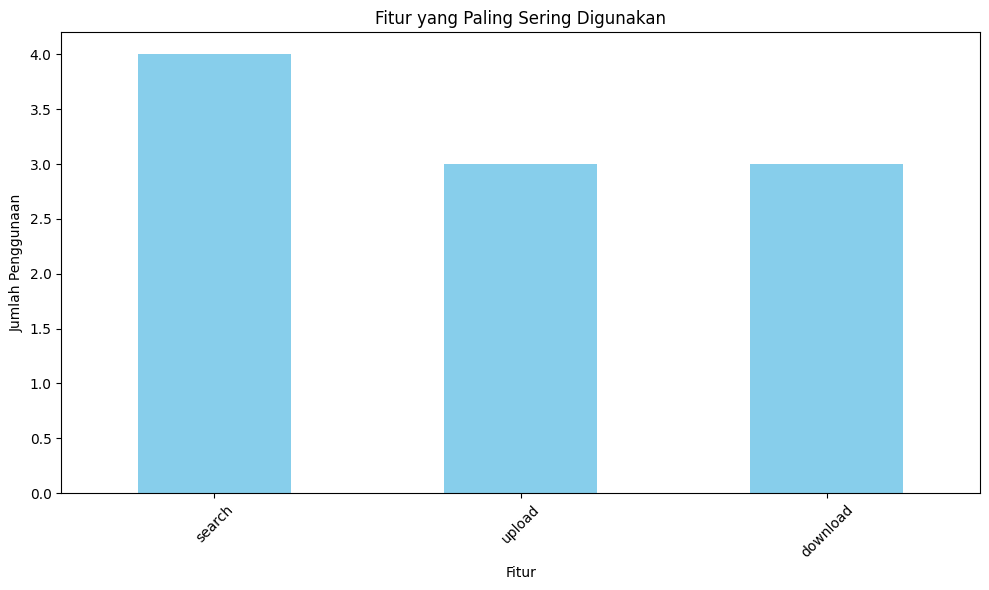

Rata-rata Durasi Sesi per Fitur:
 feature_used
download    19.666667
search      31.250000
upload      14.333333
Name: session_duration, dtype: float64


<ipython-input-17-8fcb5e259f75>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_session.index, y=avg_session.values, palette="Blues")


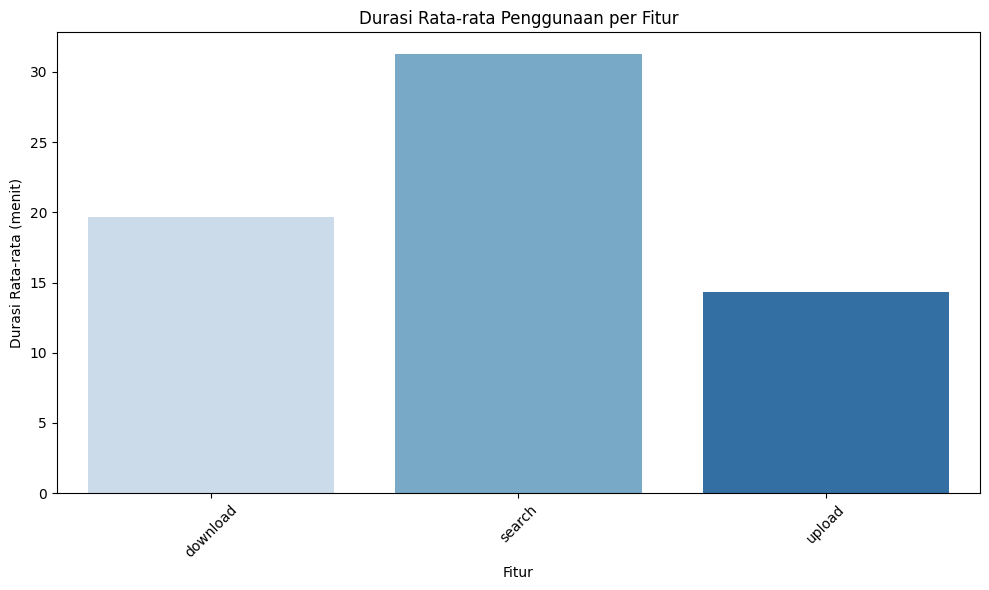

Rata-rata Feedback per Fitur:
 feature_used
search      4.500000
download    3.666667
upload      3.333333
Name: user_feedback, dtype: float64


<ipython-input-17-8fcb5e259f75>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette="coolwarm")


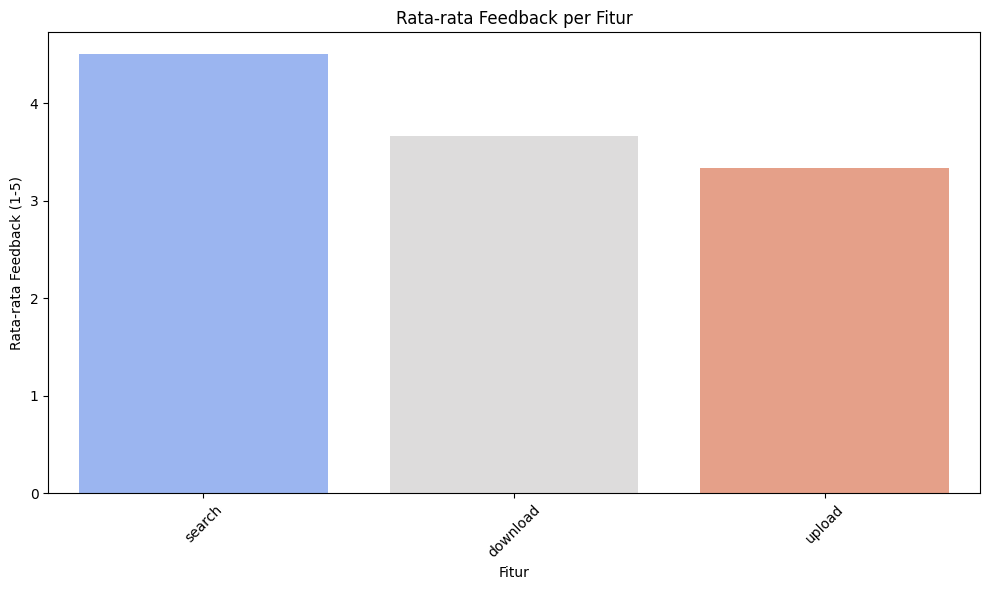

<ipython-input-17-8fcb5e259f75>:79: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['login_time'] = pd.to_datetime(data['login_time'], errors='coerce')


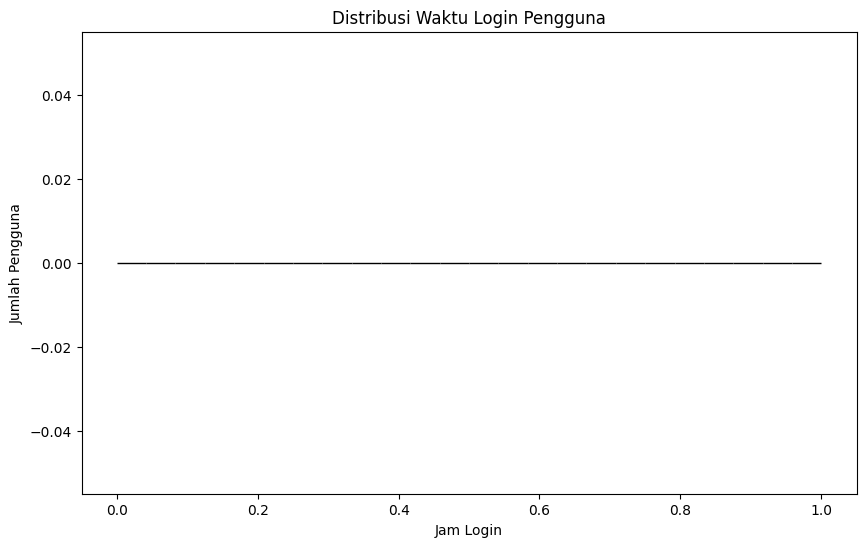

Korelasi antara Durasi Sesi dan Feedback Pengguna: 0.5634830092900749

📊 Rekomendasi untuk NovaTech:
- **Fokus pada fitur dengan rating tinggi & durasi lama** → Jika fitur memiliki rating tinggi tapi jarang digunakan, bisa dipromosikan.
- **Optimalisasi jam sibuk** → Kirim notifikasi saat pengguna paling aktif.
- **Perbaiki fitur dengan rating rendah** → Analisis lebih lanjut kenapa fitur tersebut kurang disukai.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import plotly.express as px

# Fungsi untuk memuat data
def load_data(file_path):
    return pd.read_csv(file_path, delimiter=';')

# Fungsi untuk menyimpan hasil analisis
def save_analysis_results(data, filename):
    data.to_csv(filename)

# Fungsi untuk menganalisis fitur yang paling sering digunakan
def analyze_feature_usage(data):
    if 'feature_used' in data.columns:
        feature_trend = data['feature_used'].value_counts()
        print("\nFitur Paling Populer:")
        print(feature_trend)

        # Visualisasi Fitur Populer
        plt.figure(figsize=(10, 6))
        feature_trend.plot(kind='bar', color='skyblue')
        plt.title('Fitur yang Paling Sering Digunakan')
        plt.xlabel('Fitur')
        plt.ylabel('Jumlah Penggunaan')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Kolom 'feature_used' tidak ditemukan. Cek nama kolom di CSV.")

# Fungsi untuk menganalisis rata-rata durasi sesi
def analyze_session_duration(data):
    if 'session_duration' in data.columns and 'feature_used' in data.columns:
        avg_session = data.groupby('feature_used')['session_duration'].mean()
        print("Rata-rata Durasi Sesi per Fitur:\n", avg_session)

        # Simpan hasil analisis
        save_analysis_results(avg_session, 'avg_session_duration.csv')

        # Visualisasi Rata-rata Durasi Sesi per Fitur
        plt.figure(figsize=(10, 6))
        sns.barplot(x=avg_session.index, y=avg_session.values, palette="Blues")
        plt.title('Durasi Rata-rata Penggunaan per Fitur')
        plt.xlabel('Fitur')
        plt.ylabel('Durasi Rata-rata (menit)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Kolom 'session_duration' atau 'feature_used' tidak ditemukan.")

# Fungsi untuk menganalisis rata-rata feedback pengguna
def analyze_user_feedback(data):
    if 'user_feedback' in data.columns and 'feature_used' in data.columns:
        avg_feedback = data.groupby('feature_used')['user_feedback'].mean().sort_values(ascending=False)
        print("Rata-rata Feedback per Fitur:\n", avg_feedback)

        # Simpan hasil analisis
        save_analysis_results(avg_feedback, 'avg_user_feedback.csv')

        # Visualisasi Rata-rata Feedback per Fitur
        plt.figure(figsize=(10, 6))
        sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette="coolwarm")
        plt.title('Rata-rata Feedback per Fitur')
        plt.xlabel('Fitur')
        plt.ylabel('Rata-rata Feedback (1-5)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Kolom 'user_feedback' atau 'feature_used' tidak ditemukan.")

# Fungsi untuk menganalisis waktu login
def analyze_login_time(data):
    if 'login_time' in data.columns:
        data['login_time'] = pd.to_datetime(data['login_time'], errors='coerce')
        data['login_hour'] = data['login_time'].dt.hour

        # Visualisasi distribusi login
        plt.figure(figsize=(10, 6))
        sns.histplot(data['login_hour'], bins=24, kde=True)
        plt.title('Distribusi Waktu Login Pengguna')
        plt.xlabel('Jam Login')
        plt.ylabel('Jumlah Pengguna')
        plt.show()
    else:
        print("Kolom 'login_time' tidak ditemukan.")

# Fungsi untuk menganalisis korelasi
def analyze_correlation(data):
    if 'session_duration' in data.columns and 'user_feedback' in data.columns:
        correlation = data['session_duration'].corr(data['user_feedback'])
        print("Korelasi antara Durasi Sesi dan Feedback Pengguna:", correlation)
    else:
        print("Kolom yang diperlukan tidak ditemukan untuk analisis korelasi.")

# Upload file CSV
uploaded = files.upload()

# 1. Memuat data
data = load_data('novatech_app_usage.csv')

# 2. Melihat sekilas data
print("Data Sample:")
print(data.head())

# 3. Mengecek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())

# 4. Analisis Fitur yang Paling Sering Digunakan
analyze_feature_usage(data)

# 5. Rata-rata Durasi Sesi untuk Setiap Fitur
analyze_session_duration(data)

# 6. Rata-rata Feedback Pengguna untuk Setiap Fitur
analyze_user_feedback(data)

# 7. Analisis Waktu Login
analyze_login_time(data)

# 8. Analisis Korelasi
analyze_correlation(data)

# 9. Rekomendasi berdasarkan hasil analisis
print("\n📊 Rekomendasi untuk NovaTech:")
print("- **Fokus pada fitur dengan rating tinggi & durasi lama** → Jika fitur memiliki rating tinggi tapi jarang digunakan, bisa dipromosikan.")
print("- **Optimalisasi jam sibuk** → Kirim notifikasi saat pengguna paling aktif.")
print("- **Perbaiki fitur dengan rating rendah** → Analisis lebih lanjut kenapa fitur tersebut kurang disukai.")

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membaca data
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, delimiter=';')
        data['login_time'] = pd.to_datetime(data['login_time'], format='%d/%m/%Y %H.%M', errors='coerce')
        data['login_hour'] = data['login_time'].dt.hour
        return data
    except Exception as e:
        print("Error loading data:", e)
        return None

# Fungsi untuk menghitung rata-rata sesi dan feedback per fitur
def analyze_features(data):
    avg_session = data.groupby('feature_used')['session_duration'].mean()
    avg_feedback = data.groupby('feature_used')['user_feedback'].mean()
    return avg_session, avg_feedback

# Fungsi untuk menampilkan grafik distribusi waktu login
def plot_login_distribution(data):
    plt.figure(figsize=(8, 5))
    sns.histplot(data['login_hour'], bins=10, kde=True, color='skyblue')
    plt.xlabel('Jam Login')
    plt.ylabel('Jumlah Pengguna')
    plt.title('Distribusi Waktu Login Pengguna')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Fungsi untuk menghitung korelasi antara durasi sesi dan feedback pengguna
def compute_correlation(data):
    return data['session_duration'].corr(data['user_feedback'])

# Load dataset
file_path = '/mnt/data/novatech_app_usage.csv'
data = load_data(file_path)

if data is not None:
    # Analisis fitur
    avg_session, avg_feedback = analyze_features(data)
    print("Rata-rata Durasi Sesi per Fitur:\n", avg_session)
    print("\nRata-rata Feedback per Fitur:\n", avg_feedback)

    # Plot distribusi login pengguna
    plot_login_distribution(data)

    # Korelasi
    correlation = compute_correlation(data)
    print("\nKorelasi antara Durasi Sesi dan Feedback Pengguna:", correlation)


Error loading data: [Errno 2] No such file or directory: '/mnt/data/novatech_app_usage.csv'


Rata-rata Durasi Sesi per Fitur:
 feature_used
download    19.666667
search      31.250000
upload      14.333333
Name: session_duration, dtype: float64

Rata-rata Feedback per Fitur:
 feature_used
download    3.666667
search      4.500000
upload      3.333333
Name: user_feedback, dtype: float64


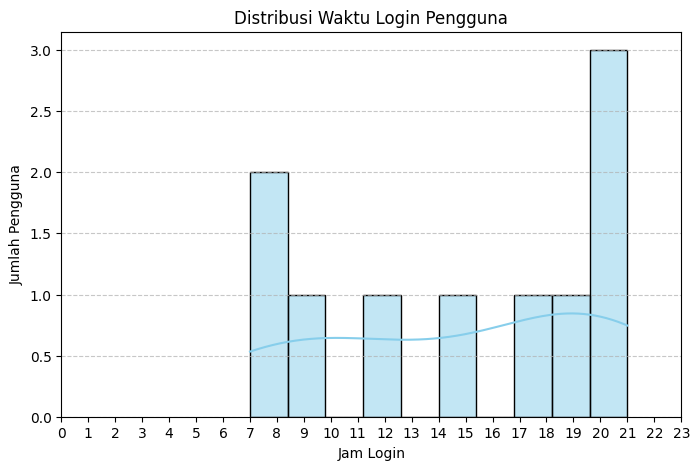


Korelasi antara Durasi Sesi dan Feedback Pengguna: 0.5634830092900749


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Fungsi untuk membaca data
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, delimiter=';')
        data['login_time'] = pd.to_datetime(data['login_time'], format='%d/%m/%Y %H.%M', errors='coerce')
        data['login_hour'] = data['login_time'].dt.hour
        return data
    except FileNotFoundError:
        print(f"File tidak ditemukan: {file_path}. Silakan unggah file CSV.")
        uploaded = files.upload()  # Prompt user to upload the file
        for filename in uploaded.keys():
            return load_data(filename)  # Try loading the uploaded file
    except Exception as e:
        print("Error loading data:", e)
        return None

# Fungsi untuk menghitung rata-rata sesi dan feedback per fitur
def analyze_features(data):
    avg_session = data.groupby('feature_used')['session_duration'].mean()
    avg_feedback = data.groupby('feature_used')['user_feedback'].mean()
    return avg_session, avg_feedback

# Fungsi untuk menampilkan grafik distribusi waktu login
def plot_login_distribution(data):
    plt.figure(figsize=(8, 5))
    sns.histplot(data['login_hour'], bins=10, kde=True, color='skyblue')
    plt.xlabel('Jam Login')
    plt.ylabel('Jumlah Pengguna')
    plt.title('Distribusi Waktu Login Pengguna')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Fungsi untuk menghitung korelasi antara durasi sesi dan feedback pengguna
def compute_correlation(data):
    return data['session_duration'].corr(data['user_feedback'])

# Load dataset
file_path = 'novatech_app_usage.csv'  # Update this path as needed
data = load_data(file_path)

if data is not None:
    # Analisis fitur
    avg_session, avg_feedback = analyze_features(data)
    print("Rata-rata Durasi Sesi per Fitur:\n", avg_session)
    print("\nRata-rata Feedback per Fitur:\n", avg_feedback)

    # Plot distribusi login pengguna
    plot_login_distribution(data)

    # Korelasi
    correlation = compute_correlation(data)
    print("\nKorelasi antara Durasi Sesi dan Feedback Pengguna:", correlation)

Rata-rata Durasi Sesi per Fitur:
 feature_used
download    19.666667
search      31.250000
upload      14.333333
Name: session_duration, dtype: float64

Rata-rata Feedback per Fitur:
 feature_used
download    3.666667
search      4.500000
upload      3.333333
Name: user_feedback, dtype: float64


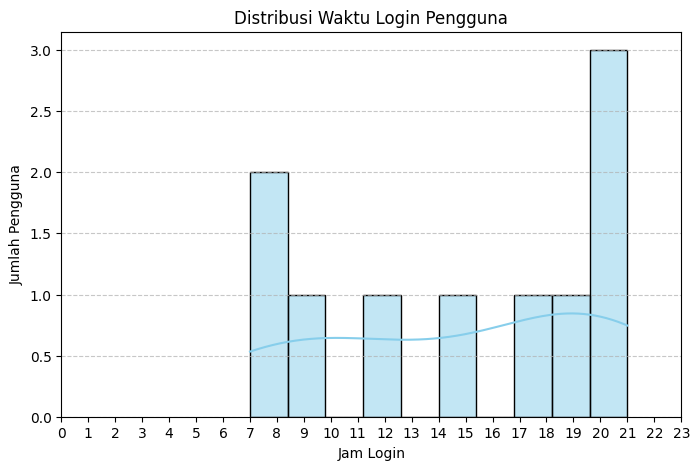


Korelasi antara Durasi Sesi dan Feedback Pengguna: 0.5634830092900749


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Fungsi untuk membaca data
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, delimiter=';')
        data['login_time'] = pd.to_datetime(data['login_time'], format='%d/%m/%Y %H.%M', errors='coerce')
        data['login_hour'] = data['login_time'].dt.hour
        return data
    except FileNotFoundError:
        print(f"File tidak ditemukan: {file_path}. Silakan unggah file CSV.")
        uploaded = files.upload()  # Prompt user to upload the file
        for filename in uploaded.keys():
            return load_data(filename)  # Try loading the uploaded file
    except Exception as e:
        print("Error loading data:", e)
        return None

# Fungsi untuk menghitung rata-rata sesi dan feedback per fitur
def analyze_features(data):
    avg_session = data.groupby('feature_used')['session_duration'].mean()
    avg_feedback = data.groupby('feature_used')['user_feedback'].mean()
    return avg_session, avg_feedback

# Fungsi untuk menampilkan grafik distribusi waktu login
def plot_login_distribution(data):
    plt.figure(figsize=(8, 5))
    sns.histplot(data['login_hour'], bins=10, kde=True, color='skyblue')
    plt.xlabel('Jam Login')
    plt.ylabel('Jumlah Pengguna')
    plt.title('Distribusi Waktu Login Pengguna')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Fungsi untuk menghitung korelasi antara durasi sesi dan feedback pengguna
def compute_correlation(data):
    return data['session_duration'].corr(data['user_feedback'])

# Fungsi utama untuk menjalankan analisis
def main():
    # Load dataset
    file_path = 'novatech_app_usage.csv'  # Update this path as needed
    data = load_data(file_path)

    if data is not None:
        # Analisis fitur
        avg_session, avg_feedback = analyze_features(data)
        print("Rata-rata Durasi Sesi per Fitur:\n", avg_session)
        print("\nRata-rata Feedback per Fitur:\n", avg_feedback)

        # Plot distribusi login pengguna
        plot_login_distribution(data)

        # Korelasi
        correlation = compute_correlation(data)
        print("\nKorelasi antara Durasi Sesi dan Feedback Pengguna:", correlation)

# Menjalankan fungsi utama
if __name__ == "__main__":
    main()